In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import seaborn as sns

# Get metrics

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

base_path = '/work/bd1179/b309215/MyIconEval/Metrics/'
metric_files = [f for f in sorted(os.listdir(base_path)) if 'trueerror' not in f]# and 'pinn' not in f]
# metric_files = [f for f in metric_files if '10p0_20p1' in f or '10p0_90p1' in f or '80p0_90p1' in f or 'baseline' in f]
len(metric_files)

183

In [3]:
baseline_file = metric_files[0]

In [4]:
def p0p1_to_mlweight_naiv(p0, p1):
    return p0/100 + (p1-p0)/2/100

In [5]:
all_metrics = {}
pinn_counts = {}
pinn_counts['0'] = 0

for f in metric_files:
    pinnweight = None
    # all_metrics[f.replace('.csv', '')] = pd.read_csv(os.path.join(base_path, f))
    p0p1 = re.search(r'(\d*p0_\d*p1)', f)
    pinn = re.search(r'_pinn385weight(\d*\.\d*).csv', f)
    p0 = '0'
    p1 = '0'
    if p0p1:
        p0p1 = p0p1.group(1)
        # if '10p0_20p1' in p0p1:
        #     print(f)
        p0 = float(re.search(r'(\d*)p0.*', p0p1).group(1))
        p1 = float(re.search(r'.*?(\d*)p1.*', p0p1).group(1))
        ml_weight_naiv = p0p1_to_mlweight_naiv(p0, p1)
        # ml_weight_naiv.append(3)
        # key = p0p1
        key = f'Mixed:{int(p0)}-{int(p1)}'
    elif 'baseline' in f:
        key = 'Tiedtke'
        ml_weight_naiv = 0
        pinnweight = 'Tiedtke'
    elif 'fullml' in f:
        key = 'Pure ML'
        ml_weight_naiv = 1
    else:
        raise Exception()
    if pinn:
        if 'fullml' in f:
            continue
        pinnweight = pinn.group(1)
        # key += f'_pinn{pinnweight}'
        key += f'_{float(pinnweight):.2f}$\\alpha$'
        if not pinn.group(1) in pinn_counts.keys():
            pinn_counts[pinnweight] = 1
        else:
            pinn_counts[pinnweight] += 1
        # if pinn.group(1) == '0.1':
        #     print(f)
    elif not 'baseline' in f:
        pinn_counts['0'] += 1
        if not 'fullml' in f:
            key += f'_0.00$\\alpha$'
        if pinnweight is None:
            pinnweight = '0'
    # if pinnweight == '0':
    #     print(f)
    #     bla += 1
        
    all_metrics[key] = pd.read_csv(os.path.join(base_path, f))
    all_metrics[key]['ml_weight_naiv'] = ml_weight_naiv
    all_metrics[key]['pinnweight'] = pinnweight
    all_metrics[key]['expname'] = f
    all_metrics[key]['p0'] = p0
    all_metrics[key]['p1'] = p1

len(all_metrics)

182

In [6]:
df = pd.concat(all_metrics.values())
df['label'] = all_metrics.keys()
df.head()

,pr_mean_icon,pr_mean_gpcp,pr_bias_gpcp,pr_rmse_gpcp,pr_r2_gpcp,tas_mean_icon,tas_mean_era5,tas_bias_era5,tas_rmse_era5,tas_r2_era5,...,E_mean_residual,m_mean_residual,u_mean_residual,v_mean_residual,ml_weight_naiv,pinnweight,expname,p0,p1,label
0,2.488060,2.721314,-0.233255,2.303083,0.307155,287.142877,288.122508,-0.979631,5.156249,0.879274,...,-0.004807,-2.734608e-14,-4.046070e-12,1.447074e-11,0.00,Tiedtke,heuer_atm_amip_R2B4_vlvl60_baseline.csv,0,0,Tiedtke
0,2.309037,2.721314,-0.412277,2.000138,0.351400,286.919188,288.122508,-1.203319,5.468991,0.883521,...,18.636816,-2.422990e-07,-1.506788e-03,-4.873045e-04,0.15,0,heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0...,10.0,20.0,Mixed:10-20_0.00$\alpha$
0,2.306197,2.721314,-0.415117,2.077817,0.210167,286.877842,288.122508,-1.244666,5.587121,0.877459,...,33.068153,-3.373733e-06,-4.356172e-03,-7.448004e-04,0.50,0,heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0...,10.0,90.0,Mixed:10-90_0.00$\alpha$
0,2.318717,2.721314,-0.402597,2.121830,0.200653,286.924630,288.122508,-1.197878,5.775682,0.873346,...,28.990456,-8.310051e-07,-2.542775e-03,-6.853089e-04,0.30,0,heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0...,20.0,40.0,Mixed:20-40_0.00$\alpha$
0,2.276979,2.721314,-0.444336,2.126226,0.167369,286.997479,288.122508,-1.125029,5.552165,0.883234,...,32.218350,-1.774368e-06,-3.375264e-03,-7.589161e-04,0.45,0,heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0...,20.0,70.0,Mixed:20-70_0.00$\alpha$


In [7]:
pinn_counts

{'0': 37, '0.01': 36, '0.1': 36, '0.5': 36, '0.9': 36}

In [8]:
print('Possible metrics: ', list(all_metrics.values())[0].columns)

Possible metrics:  Index(['pr_mean_icon', 'pr_mean_gpcp', 'pr_bias_gpcp', 'pr_rmse_gpcp',
       'pr_r2_gpcp', 'tas_mean_icon', 'tas_mean_era5', 'tas_bias_era5',
       'tas_rmse_era5', 'tas_r2_era5', 'prw_mean_icon', 'prw_mean_multi',
       'prw_bias_multi', 'prw_rmse_multi', 'prw_r2_multi', 'clt_mean_icon',
       'clt_mean_multi', 'clt_bias_multi', 'clt_rmse_multi', 'clt_r2_multi',
       'cl_mean_icon', 'cl_mean_era5', 'cl_bias_era5', 'cl_rmse_era5',
       'cl_r2_era5', 'lwcre_mean_icon', 'lwcre_mean_multi', 'lwcre_bias_multi',
       'lwcre_rmse_multi', 'lwcre_r2_multi', 'swcre_mean_icon',
       'swcre_mean_multi', 'swcre_bias_multi', 'swcre_rmse_multi',
       'swcre_r2_multi', 'pr_zon_rmse_obs', 'pr_zon_mae_obs',
       'pr_zon_bias_obs', 'pr_zon_rmse_era5', 'pr_zon_mae_era5',
       'pr_zon_bias_era5', 'ml_weight', 'E_meanabs_residual',
       'm_meanabs_residual', 'u_meanabs_residual', 'v_meanabs_residual',
       'E_mean_residual', 'm_mean_residual', 'u_mean_residual',
   

In [9]:
# all_metrics

In [10]:
# metric = 'tas_rmse_era5'
# metric = 'tas_r2_era5'
# metric = 'tas_bias_era5'
# metric = 'pr_rmse_gpcp'
# metric = 'pr_r2_gpcp'
# metric = 'pr_bias_gpcp'
# metric = 'prw_rmse_multi'
# metric = 'prw_r2_multi'
# metric = 'prw_bias_multi'
# metric = 'clt_rmse_multi'
# metric = 'clt_r2_multi'
# metric = 'cl_r2_era5'
# metric = 'cl_rmse_era5'
# metric = 'lwcre_r2_multi'
# metric = 'lwcre_rmse_multi'
# metric = 'swcre_r2_multi'
# metric = 'swcre_rmse_multi'
# metric = 'pr_zon_rmse_obs'
# metric = 'pr_zon_bias_obs'
metric = 'E_meanabs_residual'
# metric = 'E_mean_residual'

# result = {}
# # ml_weights = {}
# for i, (k, v) in enumerate(all_metrics.items()):
#     result[k] = [v['ml_weight'].item(), v['ml_weight_naiv'], v[metric].item()]
#     # ml_weights[k] = v['ml_weight'].item()

# # result = sorted(result, key=result.get)
# result = dict(sorted(result.items(), key=lambda item: item[1][2]))

In [11]:
# df[df['label'] == 'tiedtke']

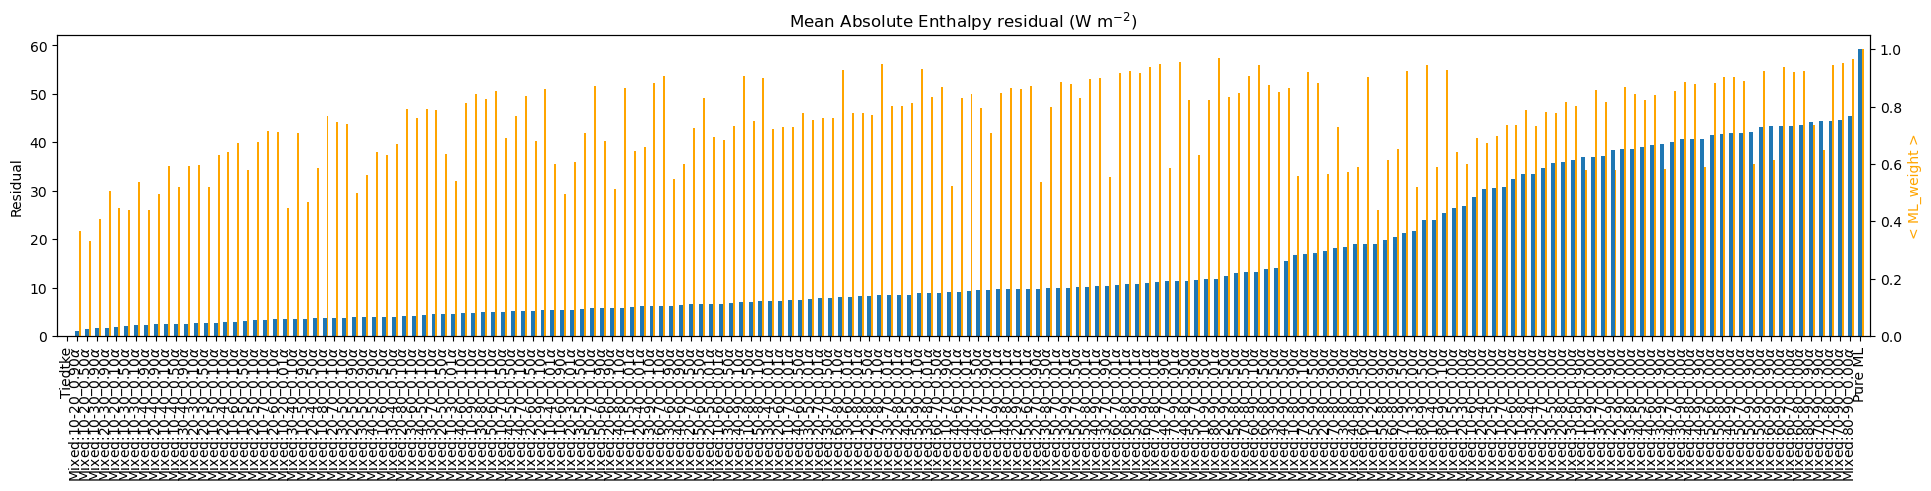

In [12]:
# x = list(result.keys())
# y = [r[2] for r in result.values()]
# mlweights = [r[0] for r in result.values()]
# mlweights_naiv = [r[1] for r in result.values()]

df = df.sort_values(metric)
# df.plot(x='label', y=metric, kind='bar')

fig, ax = plt.subplots(constrained_layout=True, figsize=(6.4*3,4.8))

ax.bar([xx for xx in range(len(df))], df[metric], width=0.4)
ax2 = plt.gca().twinx()
ax2.bar([xx+0.3 for xx in range(len(df))], df['ml_weight'], width=0.2, color='orange')
# ax.set_ylabel('Score/RMSE/Residual')
ax.set_ylabel('Residual')
# ax2.bar([xx+0.45 for xx in range(len(x))], mlweights_naiv, width=0.05, color='orange')

# ax.set_xticks(range(len(x)), [f'{l} ({round(mlw,2)})' for l,mlw in zip(x, mlweights)], rotation=90)
# ax.set_xticks(range(len(x)), [l for l,mlw in zip(x, mlweights)], rotation=90)
ax.set_xticks(range(len(df[metric])), df['label'], rotation=90)
# ax.set_title(metric)
ax.set_title("Mean Absolute Enthalpy residual (W m$^{-2}$)")
ax2.set_ylabel('< ML_weight >', color='orange')

ax.set_xlim(-1, len(df))
# ax.set_ylim(-3, 3)
# ax.set_ylim(0, 1.1)
# ax.set_ylim(-1, 1)
# plt.savefig(f'Figures/ScoreComparison_{metric}.pdf')#, dpi=300)

plt.show()

In [13]:
# df_plot['label'].str.contains(r'Mixed:10-60_0.01$\alpha$')
# r'Mixed:10-60_0.10$\alpha$' in set(df_plot['label'])
df[df['label'] == r'Mixed:10-60_0.10$\alpha$']

,pr_mean_icon,pr_mean_gpcp,pr_bias_gpcp,pr_rmse_gpcp,pr_r2_gpcp,tas_mean_icon,tas_mean_era5,tas_bias_era5,tas_rmse_era5,tas_r2_era5,...,E_mean_residual,m_mean_residual,u_mean_residual,v_mean_residual,ml_weight_naiv,pinnweight,expname,p0,p1,label
0,2.769025,2.721314,0.047711,2.349262,0.167063,285.159395,288.122508,-2.963113,7.753891,0.803314,...,0.417053,4.328487e-08,0.002008,0.000303,0.35,0.1,heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0...,10.0,60.0,Mixed:10-60_0.10$\alpha$


In [14]:
def add_missing_models(df, df_plot, metric, missing_labels):
    # display(df.head())
    new_entries = []
    for label in missing_labels:
        if label not in set(df_plot['label']):
            new_entry = df[df['label'] == label]
            new_entry = new_entry[[metric,'ml_weight','label']]
            new_entries.append(new_entry)
    new_entries = pd.concat(new_entries)
    return pd.concat([df_plot, new_entries])

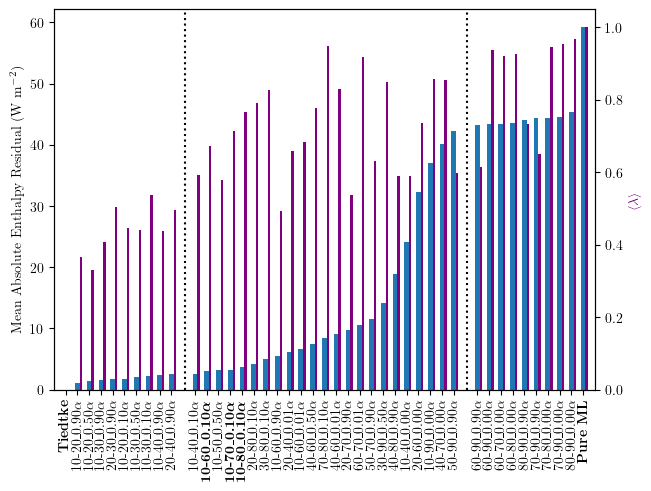

In [15]:
from setup_mpl_tex import setup_mpl_tex
import matplotlib as mpl

mpl.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

setup_mpl_tex()
# x = list(result.keys())
# y = [r[2] for r in result.values()]
# mlweights = [r[0] for r in result.values()]
# mlweights_naiv = [r[1] for r in result.values()]

ntopflop = 10
nthmiddle = 8

mark_used_models = True

# df = df.sort_values(metric)
df_plot = df[[metric,'ml_weight','label']]
df_plot = pd.concat([df_plot.iloc[:ntopflop], df_plot.iloc[ntopflop:-ntopflop:nthmiddle], df_plot.iloc[-ntopflop:]])

if mark_used_models:
    df_plot = add_missing_models(df, df_plot, metric, [r'Mixed:10-60_0.10$\alpha$', r'Mixed:10-70_0.10$\alpha$', r'Mixed:10-80_0.10$\alpha$'])

df_plot = df_plot.sort_values(metric)

df_plot = df_plot.set_index(np.arange(len(df_plot)))
df_plot['index'] = range(len(df_plot))
df_plot.loc[ntopflop:,'index'] = df_plot.loc[ntopflop:,'index'] + 1
df_plot.loc[len(df_plot)-ntopflop:,'index'] = df_plot.loc[len(df_plot)-ntopflop:,'index'] + 1
# df.plot(x='label', y=metric, kind='bar')

fig, ax = plt.subplots(constrained_layout=True, figsize=(6.4*1,4.8))

ax.bar(df_plot['index'], df_plot[metric], width=0.4)
ax2 = plt.gca().twinx()
ax2.bar(df_plot['index']+0.3, df_plot['ml_weight'], width=0.2, color='purple')
# ax.set_ylabel('Score/RMSE/Residual')
# ax.set_ylabel('Residual')
# ax2.bar([xx+0.45 for xx in range(len(x))], mlweights_naiv, width=0.05, color='orange')

# ax.set_xticks(range(len(x)), [f'{l} ({round(mlw,2)})' for l,mlw in zip(x, mlweights)], rotation=90)
# ax.set_xticks(range(len(x)), [l for l,mlw in zip(x, mlweights)], rotation=90)
ticklabels = []
for s in df_plot['label']:
    label = s.replace('Mixed:', '')
    if mark_used_models:
        if label in ['Tiedtke', 'Pure ML', r'10-60_0.10$\alpha$', r'10-70_0.10$\alpha$', r'10-80_0.10$\alpha$']:
            label = r"\bf{" + str(label).replace(r'\alpha', r'\boldsymbol{\alpha}') + "}"
    ticklabels.append(label)

ax.set_xticks(df_plot['index'], ticklabels, rotation=90)
# ax.set_xticks(df_plot['index'], [s.replace('Mixed:', '') for s in df_plot['label']], rotation=90)

# ax.set_title(metric)
ax.set_ylabel("Mean Absolute Enthalpy Residual (W m$^{-2}$)")
ax2.set_ylabel('$\\langle\\lambda\\rangle$', color='purple')

ax.axvline(ntopflop+0.15, ls=':', color='black')
ax.axvline(len(df_plot)-ntopflop+1+0.15, ls=':', color='black')

ax.set_xlim(-1, df_plot['index'].iloc[-1]+1)
# ax.grid()
# ax.set_ylim(-3, 3)
# ax.set_ylim(0, 1.1)
# ax.set_ylim(-1, 1)
# plt.savefig(f'Figures/ScoreComparison_{metric}_ntopflop{ntopflop}_nthmiddle{nthmiddle}_nomixedlabel_boldused.pdf')

plt.show()

In [14]:
df[df['label']=='Mixed:10-60_0.1$\\alpha$']['ml_weight']

Series([], Name: ml_weight, dtype: float64)

In [15]:
def is_pareto_efficient_simple(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient]<c, axis=1)  # Keep any point with a lower cost
            is_efficient[i] = True  # And keep self
    return is_efficient

def get_sorted_pareto_front(metrics):
    pareto_front = is_pareto_efficient_simple(np.stack(metrics, axis=1))
    metrics_pareto = [m[pareto_front] for m in metrics]
    sorted_idx = np.argsort(metrics_pareto[0])
    metrics_pareto = [m[sorted_idx] for m in metrics_pareto]
    return metrics_pareto, pareto_front

In [16]:
import matplotlib as mpl
from cycler import cycler

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_color_cycle)
# mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk') # default

In [17]:
df = df.iloc[::-1]
df.reset_index(inplace=True)

In [18]:
# Set pinnweight of Pure ML model to "Pure ML" for plotting
df.loc[df['expname'] == 'heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_fullml.csv','pinnweight'] = 'Pure ML'
df[df['expname'] == 'heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_fullml.csv']['pinnweight']

0    Pure ML
Name: pinnweight, dtype: object

['Tiedtke' 'Pure ML' '0.9' '0.5' '0.1' '0.01' '0']


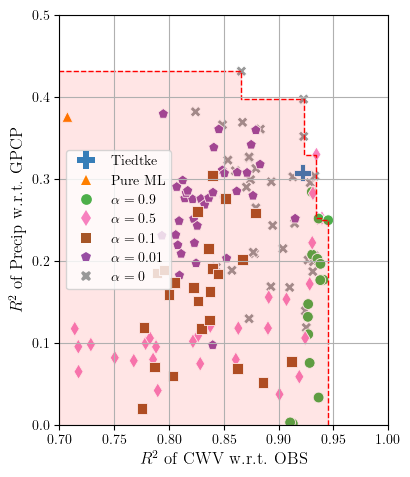

In [19]:
import seaborn as sns
sns.reset_defaults()
# plt.style.use('default')
setup_mpl_tex()
# sns.set_style("ticks")

pinnweights_uniq = np.unique(df['pinnweight'])[::-1]
print(pinnweights_uniq)

# todo:change here
# m1 = 'pr_zon_rmse_obs'
# # m1 = 'pr_r2_gpcp'
m1 = 'prw_r2_multi'
# # m2 = 'E_residual'
m2 = 'pr_r2_gpcp'
#---
# m1 = 'pr_zon_rmse_obs'
# # m2 = 'clt_r2_multi'
# m2 = 'tas_r2_era5'
# # m2 = 'cl_r2_era5'

n_pinnweights = len(df['pinnweight'].unique())

# plt.scatter(df[m1], df[m2], color=df['pinnweight'])
# df.plot.scatter(x=m1, y=m2, c='pinnweight')

# ax = sns.lmplot(x=m1, y=m2, data=df, hue='pinnweight', fit_reg=False, hue_order=pinnweights_uniq,
#                 legend=False, height=4.8, aspect=1.333*2/3,
#                 markers=['x']+['o' for _ in range(len(df['pinnweight'].unique())-1)],
#                 palette=CB_color_cycle,
#                 scatter_kws={"s": 10})

p = sns.relplot(x=m1, y=m2, data=df, hue='pinnweight', hue_order=pinnweights_uniq,
                legend=True, height=4.8, aspect=1.333*2/3,
                palette=CB_color_cycle[:n_pinnweights],
                style='pinnweight', markers=['P','^','o','d','s','p','X'], style_order=pinnweights_uniq,
                size='pinnweight', sizes=[60 for _ in range(n_pinnweights-1)]+[150])

# fig, ax = plt.subplots(figsize=[6.4*2/3,4.8], constrained_layout=True)
# ax = sns.scatterplot(x=m1, y=m2, data=df, hue='pinnweight', hue_order=pinnweights_uniq,
#                 legend=True, ax=ax,
#                 markers=['x']+['o' for _ in range(n_pinnweights-1)],
#                 palette=CB_color_cycle[:n_pinnweights],
#                 hue_sizes=[10 for _ in range(n_pinnweights)])

#todo:change here
(m1_pareto, m2_pareto), pareto_mask = get_sorted_pareto_front([-df[m1].values, -df[m2].values])
m1_pareto = -m1_pareto
m2_pareto = -m2_pareto

#todo:change here
xlim = (0.7, 1)
ylim = (0,0.5)
# ---
# xlim = (0,2)
# ylim = (0.75,1)

#todo:change here
m1_pareto_plot = np.concatenate([[m1_pareto[0]],m1_pareto,[xlim[0]]])
#---
# m1_pareto_plot = np.concatenate([[m1_pareto[0]],m1_pareto,[xlim[-1]]])
m2_pareto_plot = np.concatenate([[ylim[0]],m2_pareto,[m2_pareto[-1]]])
# m1_pareto_plot = m1_pareto
# m2_pareto_plot = m2_pareto

test = plt.step(m1_pareto_plot, m2_pareto_plot, color='red', zorder=1, where='post', ls='--', lw=1)

# Shade pareto suboptimal area
xlims = plt.gca().get_xlim()
ylims = plt.gca().get_ylim()
pareto_vertices = test[0].get_path().vertices
plt.fill_between(pareto_vertices[:,0], ylims[0], pareto_vertices[:,1], alpha=0.1, color='red')

# plt.yscale('log')

# plt.ylim(0,1)

# plt.xlim(0.4, 1.0)
# plt.ylim(0.8,1)

# plt.ylim(0,10)

# plt.xlim(0.0, 1)
plt.xlim(xlim)
plt.ylim(ylim)

sns.despine(top=False, right=False)

#todo:change here
sns.move_legend(p, "center left", frameon=True, title=None, bbox_to_anchor=(0,0.5), bbox_transform=plt.gca().transAxes)#, ncol=3, title=None, frameon=False)
#---
# sns.move_legend(p, "lower right", frameon=True, title=None, bbox_to_anchor=(1,0), bbox_transform=plt.gca().transAxes)#, ncol=3, title=None, frameon=False)
# sns.move_legend(ax, "center right")
# plt.gca().legend()#loc='lower right')

# Change float numbers to alpha=<float number>
for llabel in p._legend.texts:
    text = llabel.get_text()
    if text.replace('.','',1).isnumeric():
        llabel.set_text(f'$\\alpha = {text}$')

plt.grid()
#todo:change here
plt.xlabel('$R^2$ of CWV w.r.t. OBS', size='large')
plt.ylabel('$R^2$ of Precip w.r.t. GPCP', size='large')
#---
# plt.xlabel('RMSE of Zonal Mean Precip w.r.t. GPCP\n(mm day$^{-1}$)', size='large')
# plt.ylabel('$R^2$ of $T_{2m}$ w.r.t. ERA5', size='large')

# plt.savefig(f"Figures/Pareto-{m1}-{m2}.pdf", bbox_inches='tight')#, dpi=300)
plt.show()

In [20]:
# grouped.mean('E_meanabs_residual')
# grouped.mean()
# df_alpha
# grouped.mean()

/work/bd1179/b309215/mambaforge/envs/climlab/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/work/bd1179/b309215/mambaforge/envs/climlab/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


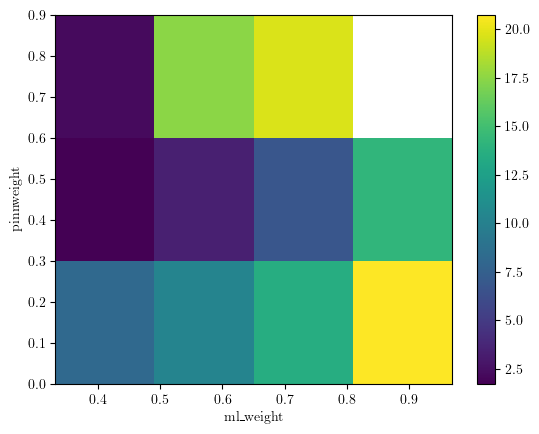

In [59]:
def get_averagevar_per_bin2d(var, binvar1, binvar2, bin_edges1, bin_edges2):
    result = np.empty((len(bin_edges1)-1, len(bin_edges2)-1))
    counts = np.empty((len(bin_edges1)-1, len(bin_edges2)-1))
    for i,(le1,he1) in enumerate(zip(bin_edges1[:-1], bin_edges1[1:])):
        for j,(le2,he2) in enumerate(zip(bin_edges2[:-1], bin_edges2[1:])):
            mask = (binvar1 >= le1) & (binvar1 <= he1) & (binvar2 >= le2) & (binvar2 <= he2)
            counts[i,j] = mask.sum()
            result[i,j] = np.mean(var[mask])

    counts[counts==0] = np.nan
    return result[:,:], counts

ml_weight_max = df_alpha['ml_weight'].values.max()
ml_weight_min = df_alpha['ml_weight'].values.min()
pinnweight_max = df_alpha['pinnweight'].values.max()
pinnweight_min = df_alpha['pinnweight'].values.min()

edges_mlweight = np.linspace(ml_weight_min, ml_weight_max, 5)
edges_pinnweight = np.linspace(pinnweight_min, pinnweight_max, 4)
mids_mlweight = (edges_mlweight[1:] + edges_mlweight[:-1]) / 2
mids_pinnweight = (edges_pinnweight[1:] + edges_pinnweight[:-1]) / 2

E_meanabs_2dbins, E_meanabs_2dcounts = get_averagevar_per_bin2d(df_alpha['E_meanabs_residual'].values,
                                                                df_alpha['ml_weight'].values,
                                                                df_alpha['pinnweight'].values,
                                                                edges_mlweight,
                                                                edges_pinnweight)

p12 = plt.pcolormesh(mids_mlweight, mids_pinnweight, E_meanabs_2dbins.T)#, cmap=cmap_counts)
plt.xlabel('ml_weight')
plt.ylabel('pinnweight')
plt.colorbar()

plt.show()

In [50]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [51]:
E_meanabs_2dbins

array([[        nan,         nan,         nan,         nan],
       [ 8.12112047,  1.70307175,  1.70307175,  2.91167757],
       [12.0316265 ,  4.67776165,  4.67776165, 19.23240846],
       [19.35836778, 12.40710712, 12.40710712,         nan]])

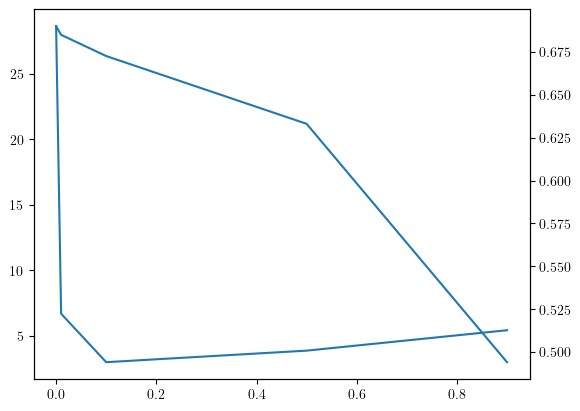

In [34]:
df_alpha = df[df['pinnweight'].str.replace('.','',1).str.isnumeric()]
df_alpha = df_alpha[['p0','p1','pinnweight','E_meanabs_residual','ml_weight']]
df_alpha['pinnweight'] = df_alpha['pinnweight'].astype(np.float64)

# Group by the two parameter columns
grouped = df_alpha.groupby(['p0', 'p1'])

# Plot each group
plt.figure()#figsize=(10, 6))

for (param1_val, param2_val), group in grouped:
    if param1_val == 10 and param2_val == 60:
        # Sort by x to ensure a proper curve
        group = group.sort_values('pinnweight')
        label = f"param1={param1_val}, param2={param2_val}"
        plt.plot(group['pinnweight'], group['E_meanabs_residual'], label=label)
        ax2 = plt.gca().twinx()
        ax2.plot(group['pinnweight'], group['ml_weight'], label=label)

# plt.legend()

# plt.plot(grouped.mean())
plt.show()

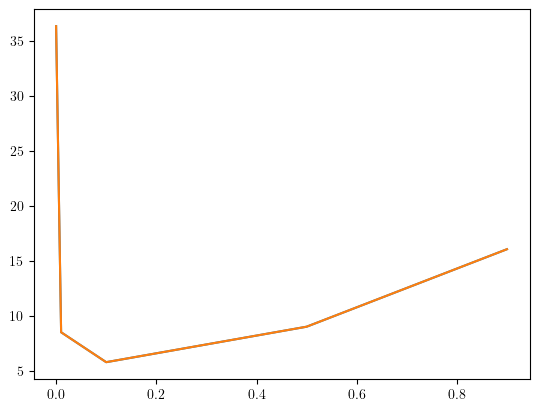

In [29]:
grouped = df_alpha.groupby(['pinnweight'])
# grouped = df_alpha.groupby([''])

plt.plot(grouped.mean()['E_meanabs_residual'])
plt.show()

(array([5.04390349, 2.96719696, 2.5086612 , 2.45725902, 2.43822211,
        2.33893179]),
 array([-0.685929,  0.769225,  0.873141,  0.919801,  0.938592,  0.955112]))

In [ ]:
df['label'].values[pareto_mask]

array(['10p0_20p1_pinn0.9', '10p0_30p1_pinn0.9', '10p0_40p1_pinn0.9',
       '40p0_80p1_pinn0.1', '30p0_90p1_pinn0.1', '70p0_80p1_pinn0.1',
       '10p0_20p1', '10p0_60p1', '20p0_50p1', '40p0_60p1',
       '40p0_90p1_pinn0.9', '60p0_90p1'], dtype=object)

In [ ]:
df[df['label'].isin(df['label'].values[pareto_mask])][['label', m1]]

,label,tas_r2_era5
0,10p0_20p1_pinn0.9,0.924044
0,10p0_30p1_pinn0.9,0.905967
0,10p0_40p1_pinn0.9,0.898269
0,40p0_80p1_pinn0.1,0.929133
0,30p0_90p1_pinn0.1,0.950214
0,70p0_80p1_pinn0.1,0.936827
0,10p0_20p1,0.883521
0,10p0_60p1,0.882421
0,20p0_50p1,0.894439
0,40p0_60p1,0.884938
